In [1]:
import warnings

warnings.filterwarnings("ignore")

warnings.simplefilter("ignore")

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn 

In [2]:
df=pd.read_csv(r"C:\Users\User\Downloads\Datasets\smsspam",sep="\t",names=["Label","Text"])
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.loc[df.Label=='ham']

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.loc[df.Label=='spam']

,Label,Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [5]:
#df.loc[df.Label=='ham',"Label"]=0

#df.loc[df.Label=='spam',"Label"]=1

#or

# you can use preprocessng label encoder part

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label    5572 non-null object
Text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [32]:
x=df.Text    # independent variable
y=df.Label  # dependent variable

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [9]:
x_train.shape

(4457,)

In [10]:
x_test.shape

(1115,)

In [11]:
# all the data are in text,so we have to convert it into a ba of words


In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()

In [33]:
#text=["this is my name","this is data scientist","this is Gaurav kapoor who is no 1 rich in world"]

#check=cv.fit_transform(text).toarray()
#check

In [34]:
#cv.inverse_transform(check[0])

In [35]:
#cv.get_feature_names()

In [36]:
#text[0]

In [38]:
# BAG OF WORDS

In [37]:
cv1=CountVectorizer(stop_words="english")

x_traincv=cv1.fit_transform(x_train)

In [18]:
x_traincv=cv1.fit_transform(x_train).toarray()

In [19]:
x_traincv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
cv1.inverse_transform(x_traincv[0])

[array(['checking', 'going', 'got', 'haha', 'lor', 'mails', 'online',
        'replying', 'sleeping', 'spys', 'wat'], dtype='<U27')]

In [21]:
x_train.iloc[0]

'U sleeping now.. Or you going to take? Haha.. I got spys wat.. Me online checking n replying mails lor..'

In [22]:
cv1.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08700621170150p',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '08

In [23]:
x_traincv.shape

(4457, 7498)

In [24]:
x_testcv=cv1.transform(x_test).toarray()

In [25]:
x_testcv.shape

(1115, 7498)

In [26]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

mnb =MultinomialNB()


mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
yp=mnb.predict(x_testcv)
yp

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [28]:
m=[" wah!!! dial *567*5# tollfreee.jeet sakte ho rs.50000 ki bike.abhi khelo click https://bit.ly/dreamandwin"]

test=cv1.transform(m)

mnb.predict(test)

array(['ham'], dtype='<U4')

In [30]:
mnb.score(x_testcv,y_test)

0.9829596412556054

In [44]:
model=BernoulliNB()
model.fit(x_traincv,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
# this is ham data
model.predict(test)

array(['ham'], dtype='<U4')

In [48]:
a=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May"]
b=cv1.transform(a)

In [49]:
mnb.predict(b)

array(['spam'], dtype='<U4')

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm=confusion_matrix(y_test,yp)
cm

array([[939,   8],
       [ 11, 157]], dtype=int64)

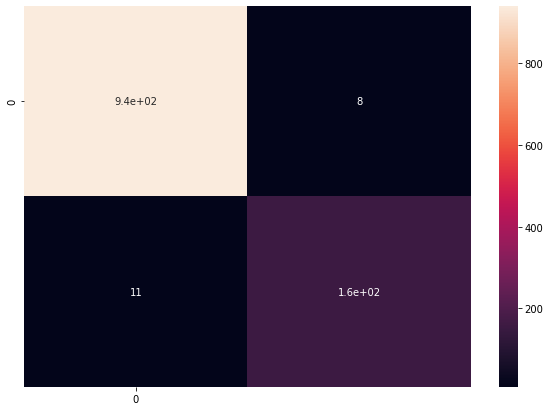

In [58]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,xticklabels=10,yticklabels=10)

In [59]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       947
        spam       0.95      0.93      0.94       168

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [60]:
print(accuracy_score(y_test,yp))

0.9829596412556054
